### Gabriela Osorio
#### DSI Project 2 - Creating Houser, a robot who predicts housing prices in Aimes, IA
#### October 21

This notebook contains the code underlying the creation of Houser, a robot who predicts housing prices in Aimes, IA. 

Creation methodology involved the use and comparison of two regression methods: Linear Regression and adhered to the following steps:

1. Baseline Model (simple model) 
2. Train-Test-Split
3. Standardizing 
4. Regularization
5. Train Model
6. Evaluate (Using R2)

## We begin by importing necessary libraries, reading in the data we have, and greeting the data with a quick quality check.

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [2]:
ai=pd.read_csv('~/Desktop/Use/train.csv')

In [3]:
ai.round(2).head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


!conda install -c conda-forge altair vega_datasets notebook vega -y
import altair as alt
alt.renderers.enable('notebook')

In [4]:
ai.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
ai.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [6]:
ai.describe().round(2)

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.00,2.051000e+03,2051.00,1721.00,2051.00,2051.00,2051.00,2051.00,2051.00,2029.00,...,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00,2051.00
mean,1474.03,7.135900e+08,57.01,69.06,10065.21,6.11,5.56,1971.71,1984.19,99.70,...,93.83,47.56,22.57,2.59,16.51,2.40,51.57,6.22,2007.78,181469.70
std,843.98,1.886918e+08,42.82,23.26,6742.49,1.43,1.10,30.18,21.04,174.96,...,128.55,66.75,59.85,25.23,57.37,37.78,573.39,2.74,1.31,79258.66
min,1.00,5.263011e+08,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,12789.00
25%,753.50,5.284581e+08,20.00,58.00,7500.00,5.00,5.00,1953.50,1964.50,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,2007.00,129825.00
50%,1486.00,5.354532e+08,50.00,68.00,9430.00,6.00,5.00,1974.00,1993.00,0.00,...,0.00,27.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,162500.00
75%,2198.00,9.071801e+08,70.00,80.00,11513.50,7.00,6.00,2001.00,2004.00,161.00,...,168.00,70.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
max,2930.00,9.241520e+08,190.00,313.00,159000.00,10.00,9.00,2010.00,2010.00,1600.00,...,1424.00,547.00,432.00,508.00,490.00,800.00,17000.00,12.00,2010.00,611657.00


In [7]:
ai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [8]:
nullcounts=ai.isnull().sum()
nullcounts

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area

In [9]:
nullcounts=pd.DataFrame(nullcounts)
nullcounts.columns=['col1']
nullcounts.sort_values(by='col1', ascending=False).head()

,col1
Pool QC,2042
Misc Feature,1986
Alley,1911
Fence,1651
Fireplace Qu,1000


## Dealing with 80 features here (not including the target), so we've decided to drop some that have a count of 1000+ null values, ie. are missing for 50% of the data. Above we've sorted the features by null counts. Now we'll drop the ones with the most.

In [10]:
ai=ai.drop(columns=['Pool QC','Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'])

## Now we'll explore our data
I notice the features can be divided into qualitative and quantitative groups, so I break the dataframe up in two. This'll just make it easier for me to summon up graphs as part of the EDA.

I'll be graphing with both seaborn and matplotlib for practice at the cost of aesthetics.

In [11]:
aiqual=ai.loc[:, ai.dtypes == object]
aiqual.columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type'],
      dtype='object')

In [12]:
ai=ai.drop(columns=['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type'])


In [13]:
ai.head()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,109,533352170,60,NaN,13517,6,8,1976,2005,289.0,...,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,59,0,0,0,0,0,3,2010,138500


In [14]:
aiqual.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Central Air,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
0,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD
1,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD
2,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD
3,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,...,Y,SBrkr,TA,Typ,BuiltIn,Fin,TA,TA,Y,WD
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,...,Y,SBrkr,TA,Typ,Detchd,Unf,TA,TA,N,WD


In [15]:
ai.columns

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

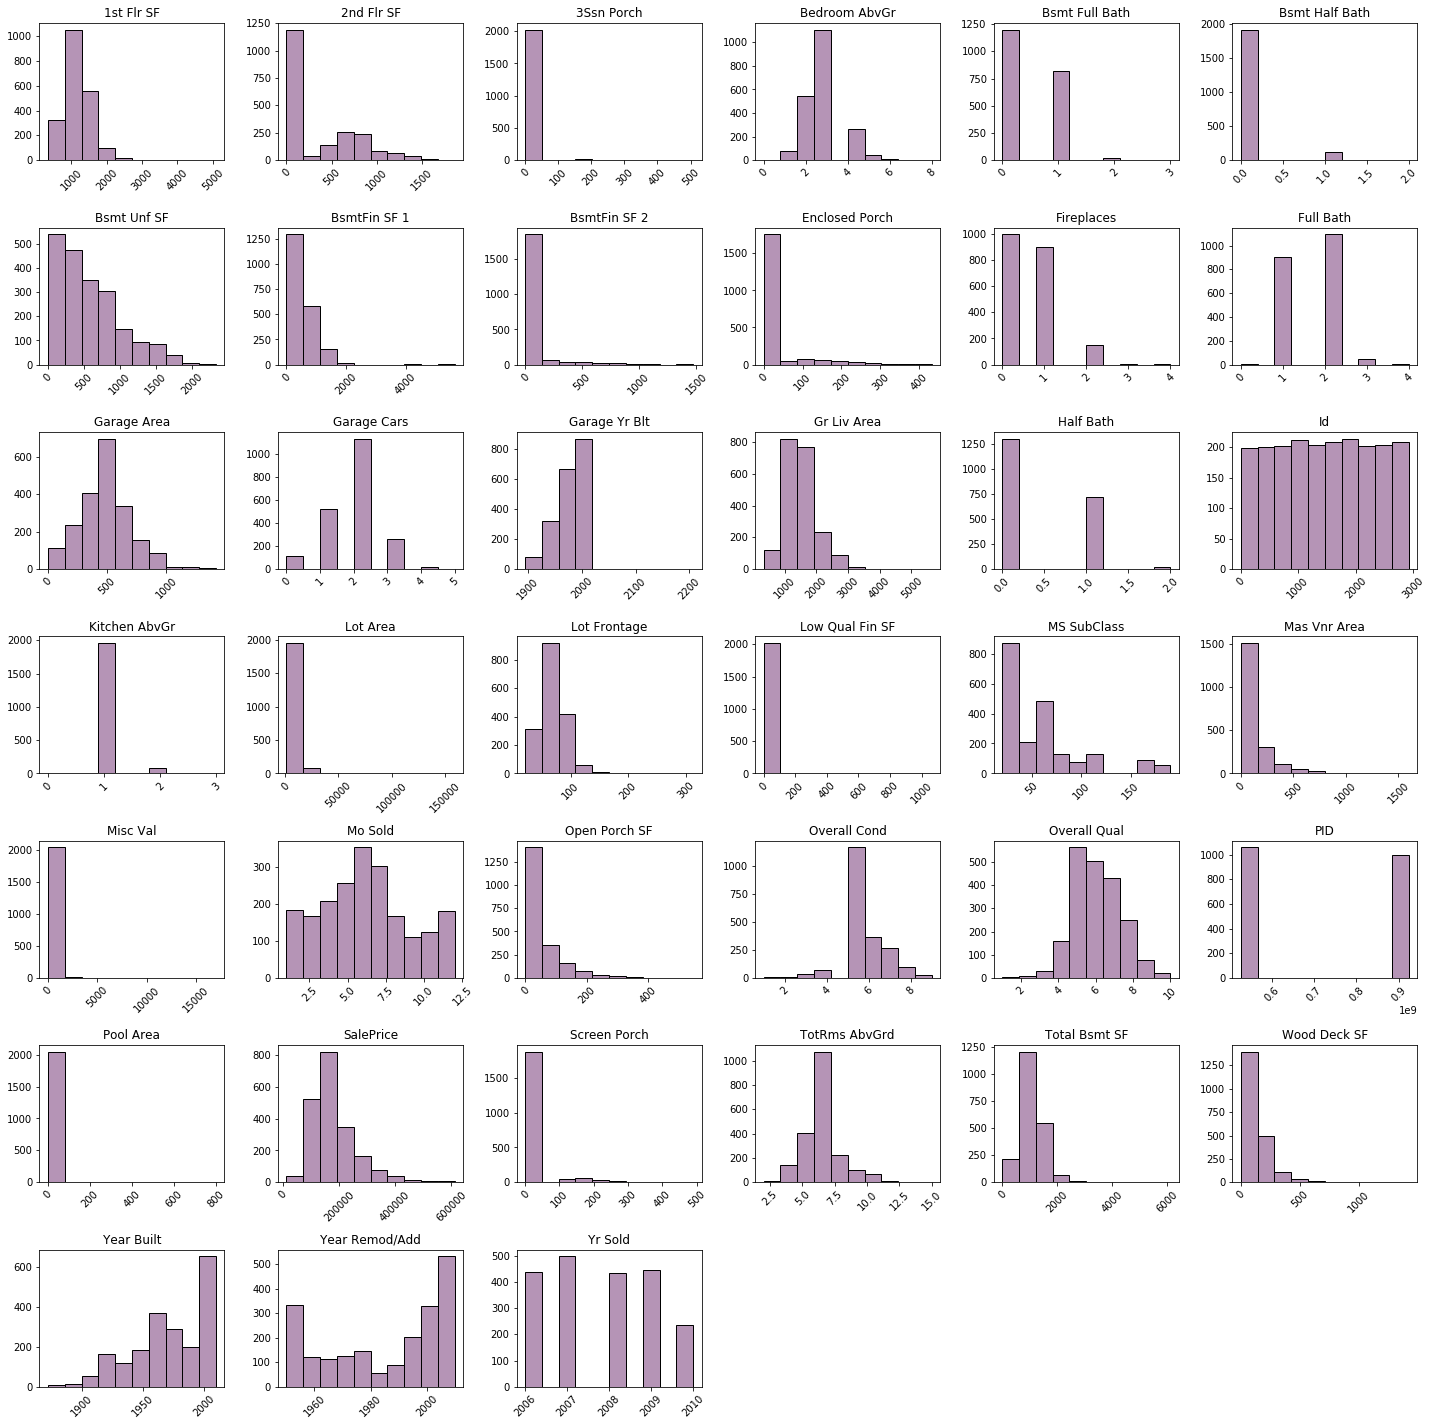

In [16]:
fig=ai.hist(bins=10,
           color='#B594B6',
           edgecolor='black', 
           linewidth=1.0,
           xlabelsize=10,ylabelsize=10,
           xrot=45, yrot=0,
           figsize=(10,10),
           grid=False)

plt.tight_layout(rect=(0,0,2,2))

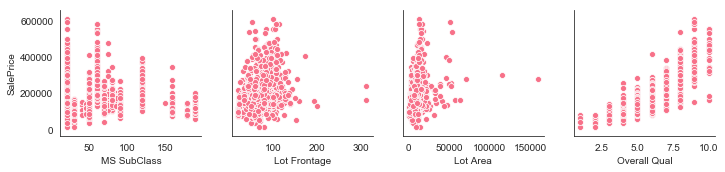

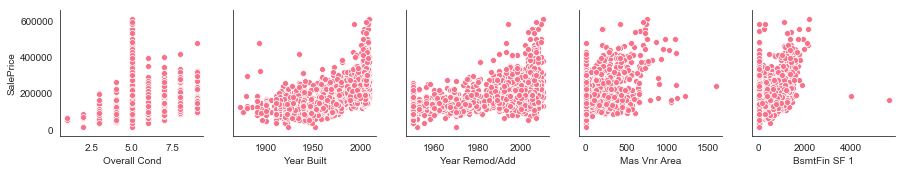

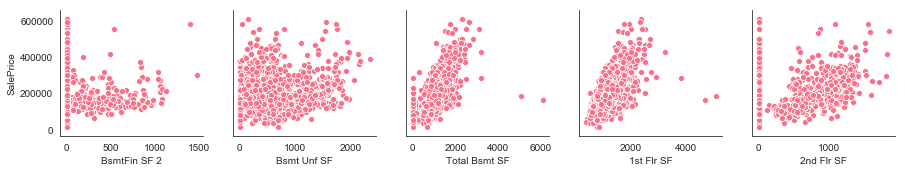

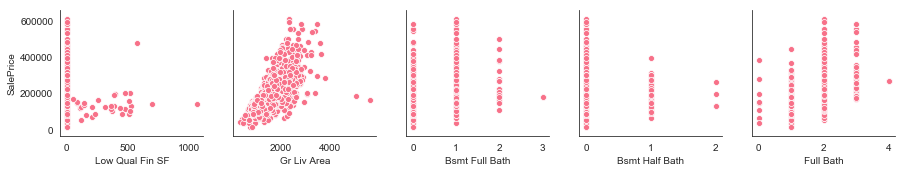

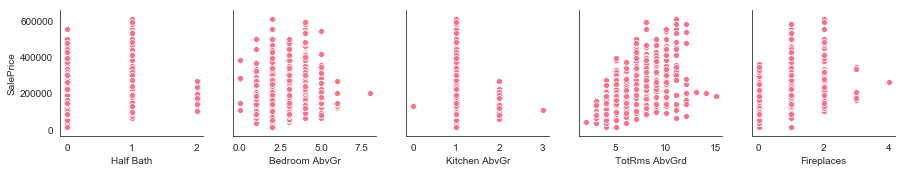

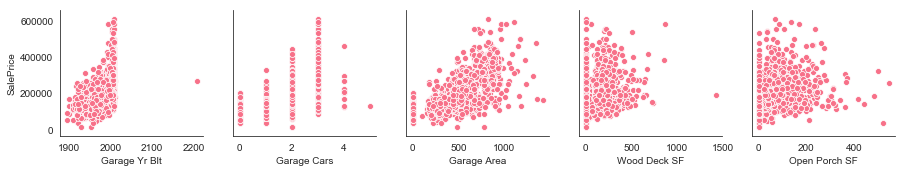

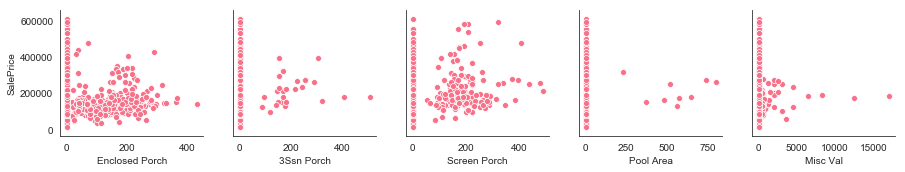

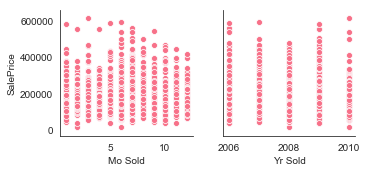

In [17]:
sns.set_style("white")
sns.set_palette("husl")
sns.pairplot(data=ai,
            y_vars=['SalePrice'],
            x_vars=['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual'],
            );
plt.show()
sns.pairplot(data=ai,
            y_vars=['SalePrice'],
            x_vars=['Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1'],
            );
plt.show()
sns.pairplot(data=ai,
            y_vars=['SalePrice'],
            x_vars=['BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF','1st Flr SF', '2nd Flr SF']
            );
plt.show() 
sns.pairplot(data=ai,
            y_vars=['SalePrice'],
            x_vars=['Low Qual Fin SF', 'Gr Liv Area','Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath']
            );   
plt.show() 
sns.pairplot(data=ai,
            y_vars=['SalePrice'],
            x_vars=['Half Bath','Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces']
            );  
plt.show()
sns.pairplot(data=ai,
            y_vars=['SalePrice'],
            x_vars=['Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF','Open Porch SF']
            );  
plt.show()
sns.pairplot(data=ai,
            y_vars=['SalePrice'],
            x_vars=['Enclosed Porch', '3Ssn Porch', 'Screen Porch','Pool Area', 'Misc Val']
            );  
plt.show()
sns.pairplot(data=ai,
            y_vars=['SalePrice'],
            x_vars=[ 'Mo Sold', 'Yr Sold']
            );  

## So far we can see a few features seem highly correlated with sale price. Most notably these appear to be:
* overall quality
* square footage - (specifically: above ground SF, basement SF, 1st floor SF, 2nd floor SF)

### That was very redundant to code, so let's figure out how to use a for loop next time we graph.

Now we'll explore the Qualitative Variables, led by the question 'are any variables related to high or low house prices?'. Let's make some bar charts.

In [18]:
newqual = pd.concat([aiqual, ai[['SalePrice']]], axis=1)
newqual.head()

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Electrical,Kitchen Qual,Functional,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,SalePrice
0,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,130500
1,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,220000
2,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,109000
3,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,...,SBrkr,TA,Typ,BuiltIn,Fin,TA,TA,Y,WD,174000
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,N,WD,138500


/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


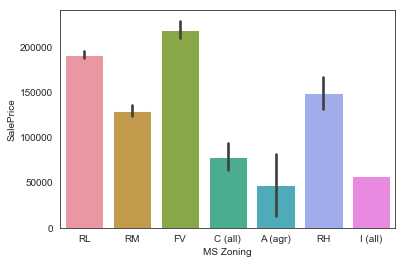

In [19]:
sns.barplot(x='MS Zoning', y='SalePrice', data=newqual);

In [20]:
quals=newqual.columns

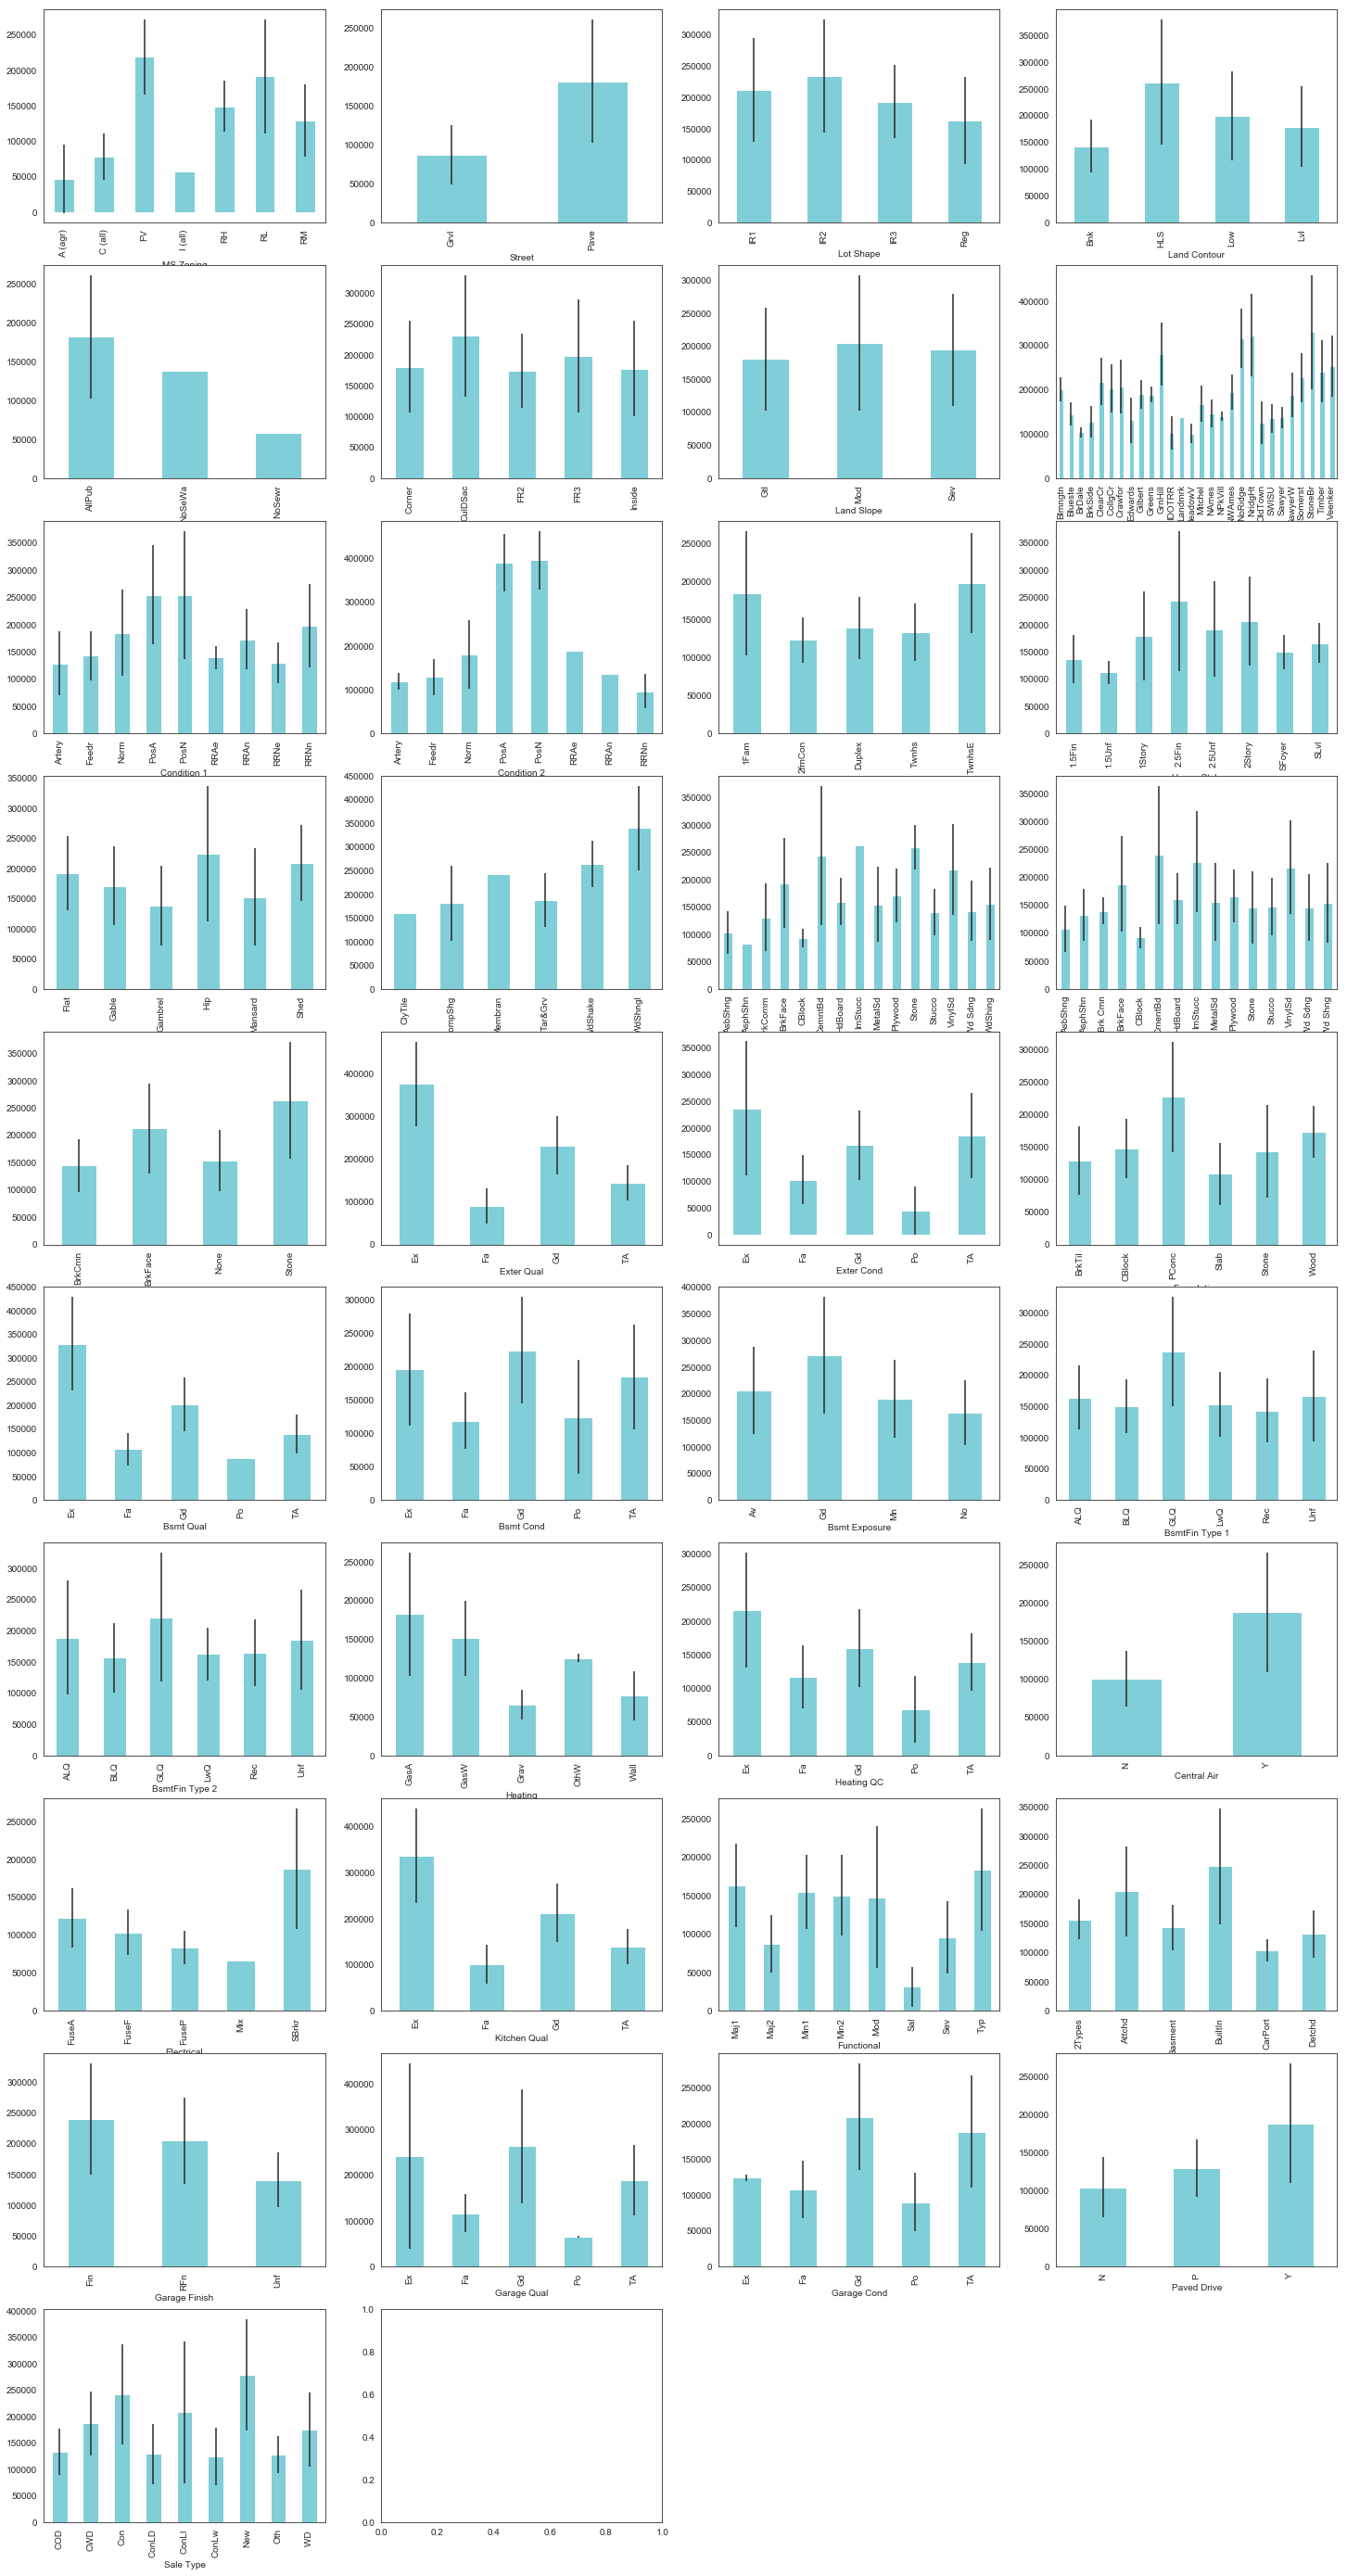

''

In [21]:
fig=plt.figure(figsize=(25,60))
for i,col in enumerate(quals):
    try:
        fig.add_subplot(12,4,1+i)
        newqual.groupby(col).mean()['SalePrice'].plot.bar(color='#80CED7',yerr=newqual.groupby(col).std())
    except:
        pass
plt.show()
;


## Okay, so we finally got the bar plots all together. That somehow took 4 hours. We're left with a major error message, but there's no time to go address it at this time so we've just suppressed it for now.  We're going to just get right into observations. The following appear associated with higher prices.
- Central Air conditioning is related with higher prices.
- Proximity to positive off-site features eg. parks 
- Shingle roofing
- Excellent Exterior Quality
- Stone Exterior
- Excellent Basment Quality
- Excellent Heating 
- Excellent Kitchn Quality
- New Garage

## Now we'll get to the preprocessing stage
#### We already dipped into it by deleting columns with many null values earlier.  We'll be extending the process by adding dummy variables for categorical values. Before we do that,  we need to deal with the rest of the null values in the chart. We also need to put the dataframes back together.

In [22]:
null_columns=[]
for i in newqual:
    if newqual[i].isnull().sum()>0:
        null_columns.append(i)
    else:
        pass

print('Qualitative Nulls To Deal With:')
null_columns

Qualitative Nulls To Deal With:


['Mas Vnr Type',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond']

In [23]:
newqual['Mas Vnr Type'] = newqual['Mas Vnr Type'].fillna('None')
newqual['Bsmt Qual'] = newqual['Bsmt Qual'].fillna('NA')
newqual['Bsmt Cond'] = newqual['Bsmt Cond'].fillna('NA')
newqual['Bsmt Exposure'] = newqual['Bsmt Exposure'].fillna('NA')
newqual['BsmtFin Type 1'] = newqual['BsmtFin Type 1'].fillna('NA')
newqual['BsmtFin Type 2'] = newqual['BsmtFin Type 2'].fillna('NA')
newqual['Garage Type'] = newqual['Garage Type'].fillna('NA')
newqual['Garage Finish'] = newqual['Garage Finish'].fillna('NA')
newqual['Garage Qual'] = newqual['Garage Qual'].fillna('NA')
newqual['Garage Cond'] = newqual['Garage Cond'].fillna('NA')
newqual.isnull().sum()

MS Zoning         0
Street            0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Heating           0
Heating QC        0
Central Air       0
Electrical        0
Kitchen Qual      0
Functional        0
Garage Type       0
Garage Finish     0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Sale Type         0
SalePrice         0
dtype: int64

### Happy to see that all the qualitative nulls have been fixed. Onto the quantitative.

In [24]:
na_columns=[]
for i in ai:
    if ai[i].isnull().sum()>0:
        na_columns.append(i)
    else:
        pass
print('Quantitative Nulls To Deal With:')

na_columns

Quantitative Nulls To Deal With:


['Lot Frontage',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area']

In [25]:
ai['Lot Frontage'] = ai['Lot Frontage'].fillna(0)
ai['Mas Vnr Area'] = ai['Mas Vnr Area'].fillna(0)
ai['BsmtFin SF 1'] = ai['BsmtFin SF 1'].fillna(0)
ai['BsmtFin SF 2'] = ai['BsmtFin SF 2'].fillna(0)
ai['Bsmt Unf SF'] = ai['Bsmt Unf SF'].fillna(0)
ai['Total Bsmt SF'] = ai['Total Bsmt SF'].fillna(0)
ai['Bsmt Full Bath'] = ai['Bsmt Full Bath'].fillna(0)
ai['Bsmt Half Bath'] = ai['Bsmt Half Bath'].fillna(0)
ai['Garage Yr Blt'] = ai['Garage Yr Blt'].fillna(np.nanmedian(ai['Garage Yr Blt']))
ai['Garage Area'] = ai['Garage Area'].fillna(0)
ai['Garage Cars'] = ai['Garage Cars'].fillna(0)
print(ai.isnull().sum().sum())

print('Yeehaw, no nulls here')


0
Yeehaw, no nulls here


### Now we have complete data.
#### We replaced all quantitative null values with 0s, except for Garage Year Built. This is because if we were to set this value to 0 like the others, it would become a major outlier from the others values which are all at least 1900 away from that value. The 0s are an okay choice for the other quantitative features because it's a realistic possibility here. For example, it's likely that some houses just don't have a garage so it's reasonable to put down 0. I do recognize that I might be putting my data at risk with this kind of reasoning. 

### Time to create dummy variables!

In [26]:
dummies = pd.get_dummies(newqual)
dummies.drop(columns='SalePrice')
dummies.head()

ames = pd.concat([dummies, ai], axis=1)
ames.head()

,SalePrice,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,130500,0,0,0,0,0,1,0,0,1,...,0,44,0,0,0,0,0,3,2010,130500
1,220000,0,0,0,0,0,1,0,0,1,...,0,74,0,0,0,0,0,4,2009,220000
2,109000,0,0,0,0,0,1,0,0,1,...,0,52,0,0,0,0,0,1,2010,109000
3,174000,0,0,0,0,0,1,0,0,1,...,100,0,0,0,0,0,0,4,2010,174000
4,138500,0,0,0,0,0,1,0,0,1,...,0,59,0,0,0,0,0,3,2010,138500


### Our data's all clean. Let's now get to the Train-Test-Split. Making sure to do this before scaling or anything else so as to avoid any data leakage.

In [27]:
X=ames.drop('SalePrice', axis=1)

In [28]:
y=ames['SalePrice']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


In [30]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Finally, time to begin modeling.
#### Crucially, we'll start by creating a very simple model to use as a baseline.

In [31]:
baseline=LinearRegression()

In [32]:
baseline_sc=LinearRegression()

In [33]:
baseline.fit(X_train, y_train)
train_score = baseline.score(X_train, y_train)
test_score = baseline.score(X_test, y_test)
print('NonScaled:',train_score, test_score)

baseline_sc.fit(X_train_sc, y_train)
train_score_sc = baseline_sc.score(X_train, y_train)
test_score_sc = baseline_sc.score(X_test, y_test)
print('Scaled:',train_score_sc, test_score_sc)

NonScaled: 0.930252246653823 0.9134690305330363
Scaled: -1.0491685815508785e+28 -1.0446027486330835e+28


#### Okay, so our super basic linear regression model scored an r^2 value of 0.93 and 0.91 out of 1.00 on the training and test set respectively. 

#### One thing to note is that the scores for the scaled model and values did much worse than the non-scaled. Let's beat it now by trying out different regularization types - Lasso and Ridge. First, let's check for multicollinerity using a heatmap

In [34]:
ames_corr=ames.corr()
ames_corr.columns

ames_corr = ames_corr[~(ames_corr <= 0.8)] 

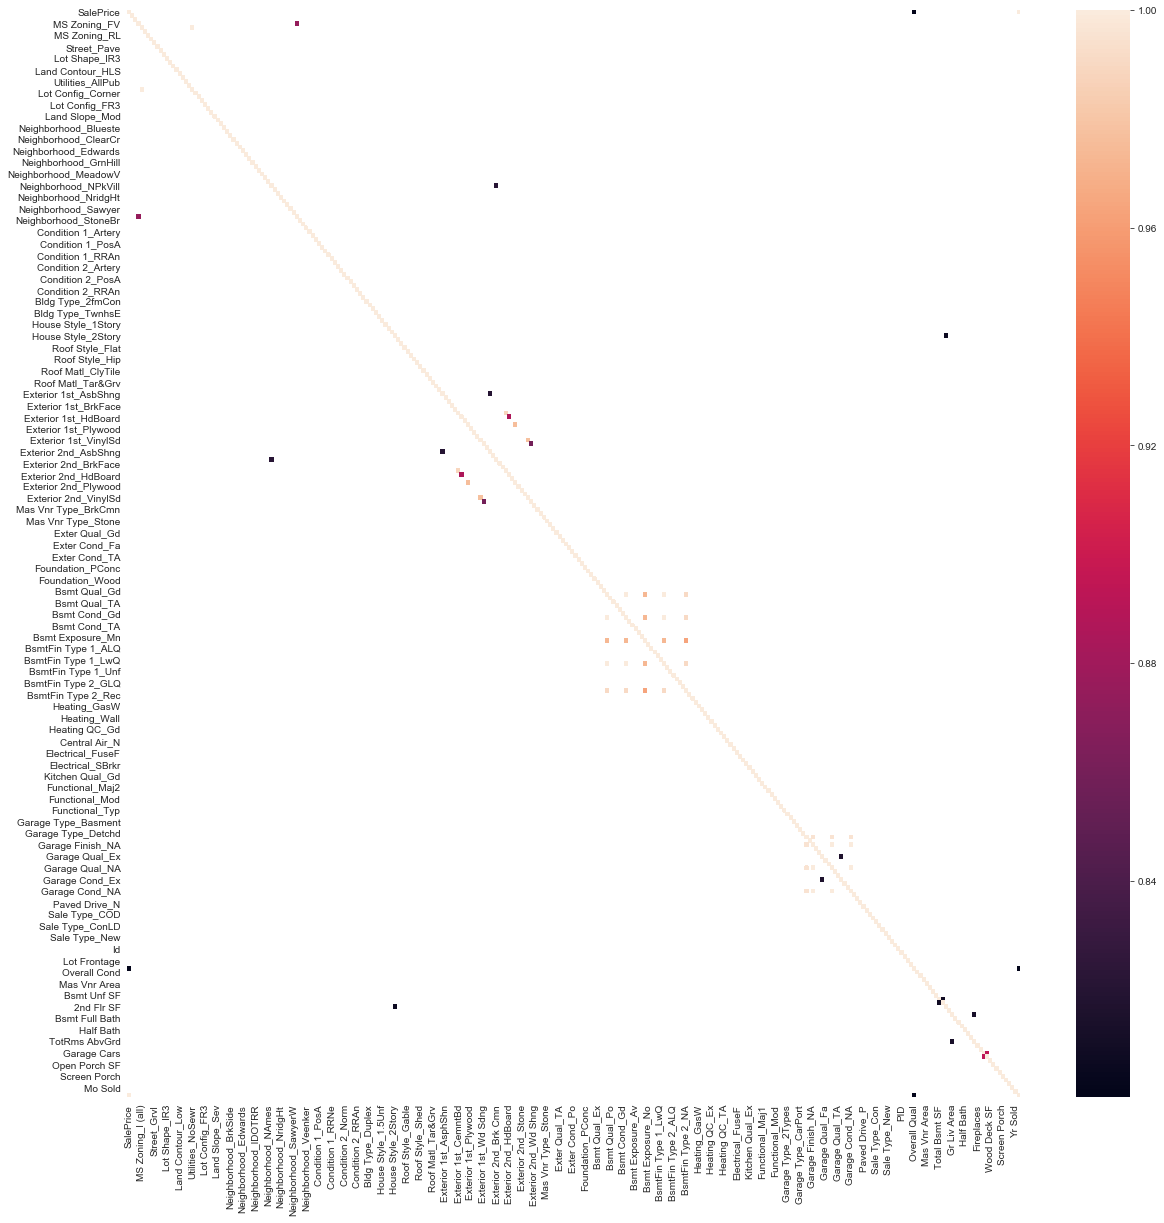

In [35]:
%matplotlib inline
sns.palplot(sns.diverging_palette(10, 220, sep=80, n=7))

fig = plt.subplots(figsize=(20,20))

#mask = np.zeros_like(ames_corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

ax=sns.heatmap(ames_corr)

plt.show();

#### Clearly there are too many features to get an easy-to-read heatmap, however we can at least see that there are definitely some variables that seem to be affecting each other as per their coefficient values identified as dark points. This suggests that we'll want to do some polynomial exploratory work later. But first, let's explore some regularization. Even though the non-scaled baseline model did better than the scaled one, i'll continue with scaled models only here due to the intuition that this'll perform best.

In [38]:
rip = Ridge()
lassy = Lasso()
elasti = ElasticNet()

In [41]:
rip = rip.fit(X_train_sc, y_train)
lassy = lassy.fit(X_train_sc, y_train) 
elasti= elasti.fit(X_train_sc, y_train)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [46]:
rip_train_score = rip.score(X_train_sc, y_train)
rip_test_score = rip.score(X_test_sc, y_test)
lassy_train_score = lassy.score(X_train_sc, y_train)
lassy_test_score = lassy.score(X_test_sc, y_test)
elasti_train_score = elasti.score(X_train_sc, y_train)
elasti_test_score= elasti.score(X_test_sc, y_test)

In [53]:
print('ridge train:', (rip_train_score))
print('ridge test:', rip_test_score) 
print('lasso train:', lassy_train_score)
print('lasso test:',lassy_test_score)
print('elasticnet train:', elasti_train_score)
print('elasticnet test:',elasti_test_score)

ridge train: 0.9302505921656032
ridge test: 0.9135482651521697
lasso train: 0.9302519386739858
lasso test: 0.9135949339930046
elasticnet train: 0.9138617841760514
elasticnet test: 0.9049668148900969


## HOLY these are pretty nice R2 scores, especially in comparison to the baseline scores from earlier that were in the 70s! Let's cross validate now for further improvements.

#### Tried to use regalar lassocv and elasticnetcv but came up with an error, learned to use MultiTaskElasticNetCV and MultiTaskLassoCV instead

In [82]:

from sklearn.linear_model import MultiTaskLassoCV, MultiTaskElasticNetCV

In [83]:
ripcv = RidgeCV(alphas=np.logspace(-2,4,7))
lassycv = MultiTaskLassoCV()
elasticv = MultiTaskElasticNetCV()

In [84]:
ridgecv = ripcv.fit(X_train_sc, y_train)
lassocv = lassycv.fit(X_train_sc, y_train)
enetcv = elasticv.fit(X_train_sc, y_train)

In [85]:
ridgecv_train_score = ridgecv.score(X_train_sc, y_train)
ridgecv_test_score = ridgecv.score(X_test_sc, y_test)
lassocv_train_score = lassocv.score(X_train_sc, y_train)
lassocv_test_score = lassocv.score(X_test_sc, y_test)
enetcv_train_score = enetcv.score(X_train_sc, y_train)
enetcv_test_score = enetcv.score(X_test_sc, y_test)

In [86]:
print('ridge train:',ridgecv_train_score)
print('ridge test:',ridgecv_test_score)
print('lasso train:',lassocv_train_score)
print('lasso test:',lassocv_test_score)
print('enet train:',enetcv_train_score)
print('enet test:',enetcv_test_score)

ridge train: 0.9088504783707623
ridge test: 0.9023959204804268
lasso train: 0.9162948071947375
lasso test: 0.9213112050789397
enet train: 0.22839089181956296
enet test: 0.23691714325019697


### Lasso's beat the others here, nice

### And there we have a half-decent model that Houser, our little housing price robot can use to predict housing prices.

In [88]:

from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.turbosquid.com/3d-models/3d-model-house-robot/713306")

In [ ]:
![title](img/picture.png)